## Example Code

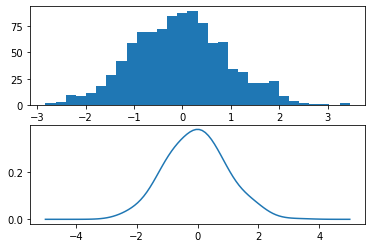

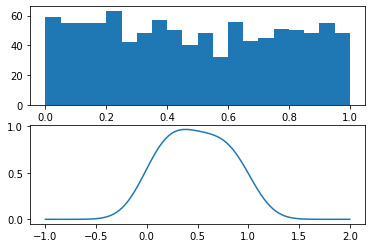

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

    
# Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
ax[0].hist(x, bins=30) # number of bins
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
ax[1].plot(x_values, ks_density(x_values))


# Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
ax2[1].plot(x_values, ks_density(x_values))
plt.show()

In [2]:
SAVE = False

## 1. Uniform and Normal Random Variables

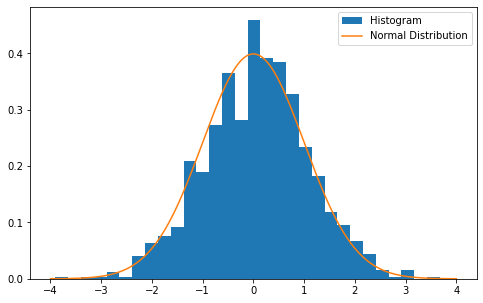

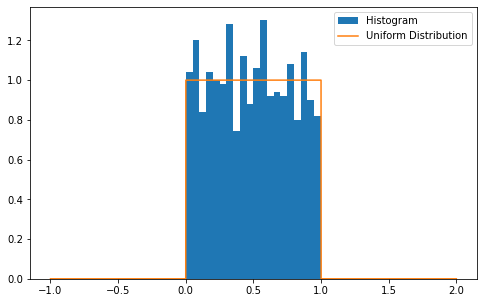

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Plot normal distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
x = np.random.randn(1000)
ax.hist(x, bins=30, density=True, label='Histogram') # number of bins
x2 = np.linspace(-4, 4, 10000)
ax.plot(x2, stats.norm.pdf(x2, 0, 1), label="Normal Distribution")
ax.legend()


# Plot uniform distribution
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(8, 5)
x = np.random.rand(1000)
ax2.hist(x, bins=20, density=True, label='Histogram')
x_values = np.linspace(-1., 2., 10000)
ax2.plot(x_values, stats.uniform.pdf(x_values), label='Uniform Distribution')
ax2.legend()


if SAVE:
    fig.savefig('1_normal.png', dpi=fig.dpi)
    fig2.savefig('1_uniform.png', dpi=fig.dpi)
    
plt.show()

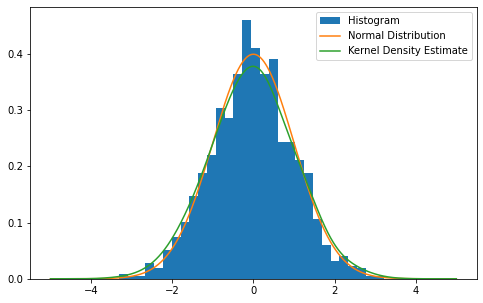

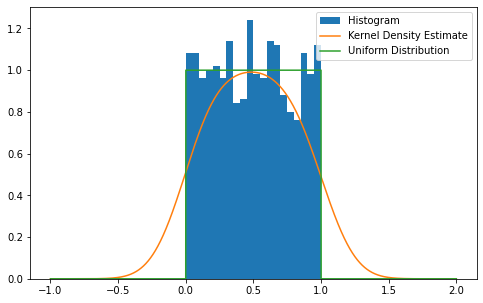

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

    
# Plot normal distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
x = np.random.randn(1000)
ax.hist(x, bins=30, density=True, label="Histogram") # number of bins
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 10000)
ax.plot(x_values, stats.norm.pdf(x_values, 0, 1), label="Normal Distribution")
ax.plot(x_values, ks_density(x_values), label="Kernel Density Estimate")
plt.legend()


# Plot uniform distribution
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(8, 5)
x = np.random.rand(1000)
ax2.hist(x, bins=20, density=True, label="Histogram")
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 10000)
ax2.plot(x_values, ks_density(x_values), label="Kernel Density Estimate")
ax2.plot(x_values, stats.uniform.pdf(x_values, 0, 1), label="Uniform Distribution")
plt.legend()

if SAVE:
    fig.savefig('1_normal_kernel_est.png', dpi=fig.dpi)
    fig2.savefig('1_uniform_kernel_est.png', dpi=fig.dpi)
    
plt.show()

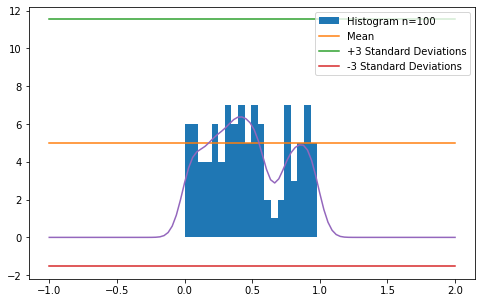

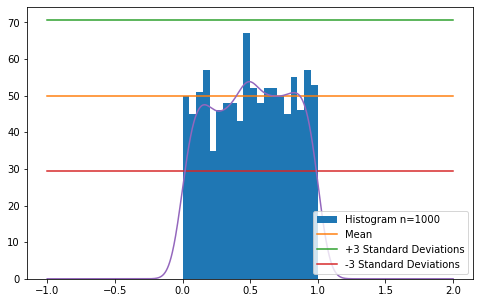

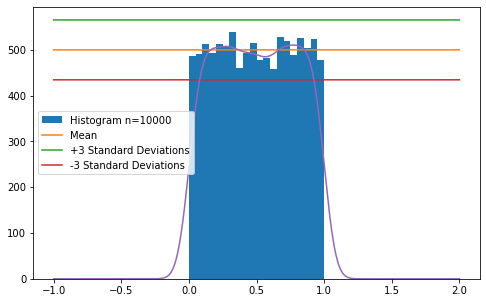

In [5]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis, n):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y * n / 20
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd


def uniform_1_plot(n):
    bins = 20
    
    # Plot uniform distribution
    fig2, ax2 = plt.subplots(1)
    fig2.set_size_inches(8, 5)
    x = np.random.rand(n)
    ax2.hist(x, bins=bins, label=f"Histogram n={n}")
    mean = n / bins
    sd = ((n / bins) * (1 - 1/bins))**(1/2)
    y_upper_sd = np.array([mean + 3 * sd for _ in range(n)])
    y_lower_sd = np.array([mean - 3 * sd for _ in range(n)])
    y_mean = np.array([mean for _ in range(n)])
    x_values = np.linspace(-1., 2., n)
    ax2.plot(x_values, y_mean, label="Mean")
    ax2.plot(x_values, y_upper_sd, label="+3 Standard Deviations")
    ax2.plot(x_values, y_lower_sd, label="-3 Standard Deviations") 
    ks_density = ksdensity(x, width=0.07)
    
    ax2.plot(x_values, ks_density(x_values, n))
    plt.legend()
    
    
    if SAVE:
        fig2.savefig(f'1_uniform_{n}_samples.png', dpi=fig.dpi)
        
    plt.show()
    
    
uniform_1_plot(100)
uniform_1_plot(1000)
uniform_1_plot(10000)

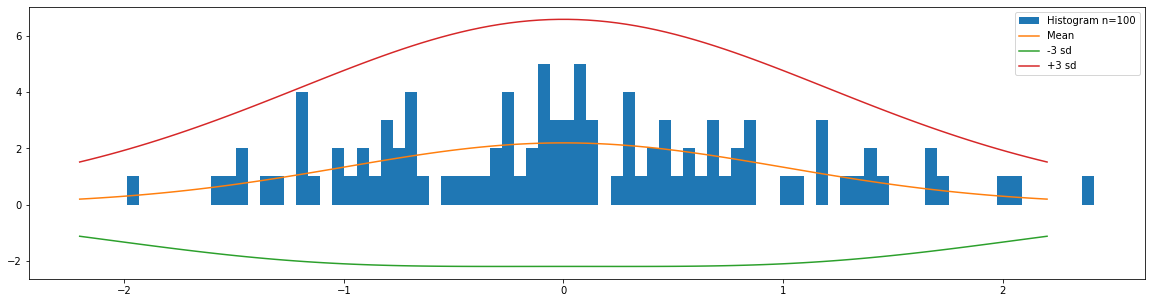

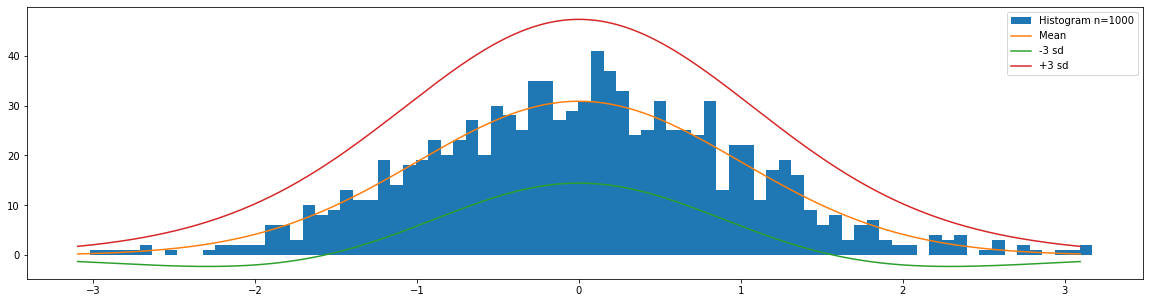

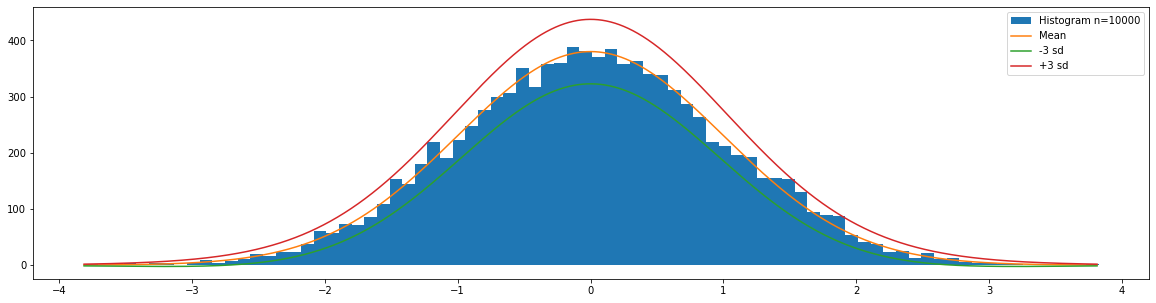

In [119]:
# FTR Gausian
import scipy

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis, n):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y * n / 20
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd


def gaussian_1_plot(n):
    bins = 80
    
    # Plot uniform distribution
    fig2, ax2 = plt.subplots(1)
    fig2.set_size_inches(20, 5)
    x = np.random.randn(n)
    hist = ax2.hist(x, bins=bins, label=f"Histogram n={n}")
    bin_range = max(list(hist)[1]) - min(list(hist)[1])
    # calculate Pj
    x_values = np.linspace(-bin_range/2, bin_range/2, n)
    
    pj = scipy.stats.norm.cdf(x_values + bin_range/bins/2) - scipy.stats.norm.cdf(x_values - bin_range/bins/2)
    ax2.plot(x_values, pj*n, label="Mean")
    
    sd = np.sqrt(n*pj*(1-pj))*3
    ax2.plot(x_values, pj*n - sd, label="-3 sd")

    ax2.plot(x_values, pj*n + sd, label="+3 sd")
    plt.legend()
    
    
    if SAVE:
        fig2.savefig(f'1_uniform_{n}_samples.png', dpi=fig.dpi)
        
    plt.show()
    
    
gaussian_1_plot(100)
gaussian_1_plot(1000)
gaussian_1_plot(10000)

## 2. Functions of random variables

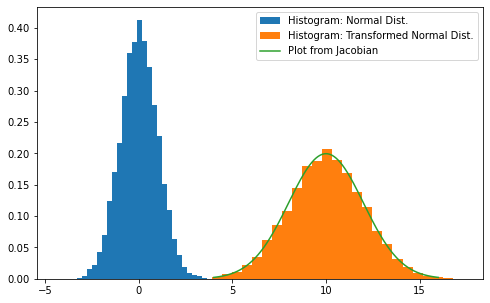

In [6]:
import scipy.stats as stats
import math

bins = 30
n = 10000
a = 2
mu = 10
b = np.full(n, mu)


# Plot normal distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
x = np.random.randn(n)
ax.hist(x, bins=bins, density=True, label="Histogram: Normal Dist.")
# Plot transformed distribution
x1 = a*x + b
ax.hist(x1, bins=bins, density=True, label="Histogram: Transformed Normal Dist.")

# # Plt Gaussian (scaled by 2.5)
# x2 = np.linspace(mu - 3*a, mu + 3*a, 1000)
# ax.plot(x2, stats.norm.pdf(x2, mu, abs(a)))

# Plt Gaussian Manual (scaled by 2.2)
def gaussian(x):
    # print(type(x))
    return (1/(((2*math.pi)**(1/2))*abs(a)))*((math.e)**(-((x-mu)**2)/(2*(abs(a)**(2)))))

x3 = np.linspace(mu - 3*a, mu + 3*a, 1000)
y = np.array([gaussian(i) for i in x3])
ax.plot(x3, y, label="Plot from Jacobian")
plt.legend()

if SAVE:
    fig.savefig(f'2_normal_jacobian_linear.png', dpi=fig.dpi)

plt.show()

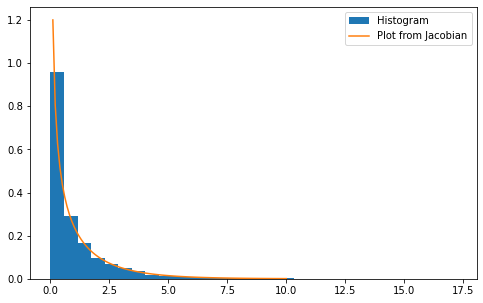

In [7]:
bins = 30
n = 10000
# a = 2
# mu = 10
# b = np.full(n, mu)


# Plot normal distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
# Plot transformed distribution
x = np.random.randn(n)
x1 = x**2
ax.hist(x1, bins=bins, density=True, label="Histogram")

def not_gaussian(x):
    # print(type(x))
    return (1/(((x*2*math.pi)**(1/2))*2))*((math.e)**(-x/(2))) * 2

x_values = np.linspace(0.1, 10, 100)
y = np.array([not_gaussian(i) for i in x_values])
ax.plot(x_values, y, label="Plot from Jacobian")
plt.legend()

if SAVE:
    fig.savefig(f'2_normal_jacobian_x_squared.png', dpi=fig.dpi)

plt.show()


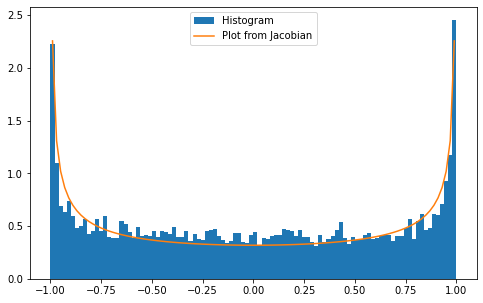

In [130]:
bins = 100
n = 10000
# a = 2
# mu = 10
# b = np.full(n, mu)


# Plot normal distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
# Plot transformed distribution
x = np.random.randn(n)
x1 = np.sin(x)
ax.hist(x1, bins=bins, density=True, label="Histogram")

def not_gaussian(x):
    # print(type(x))
    if x == 0:
        return 1/(2*math.pi)
    else:
        return 1/(math.pi*abs(math.cos(math.asin(x))))

x_values = np.linspace(-0.99, 0.99, 100)
y = np.array([not_gaussian(i) for i in x_values])
ax.plot(x_values, y, label="Plot from Jacobian")
plt.legend()

if SAVE:
    fig.savefig(f'2_normal_jacobian_x_squared.png', dpi=fig.dpi)

plt.show()


ValueError: math domain error

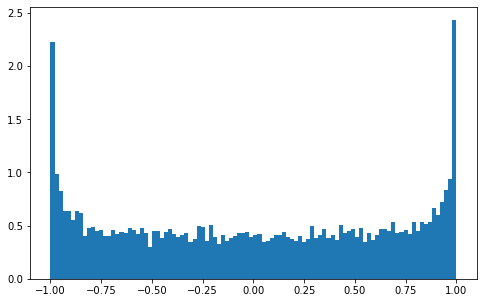

In [134]:
bins = 100
n = 10000

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)
# Plot transformed distribution
x = np.random.randn(n)
x1 = np.sin(x)
ax.hist(x1, bins=bins, density=True, label="Histogram")

def not_gaussian(x):
    # print(type(x))
    if x == 0:
        return 1/(2*math.pi)
    else:
        return 1/(math.pi*abs(math.cos(math.asin(x))))

def clipping_filter(x, y):
    if x > 0.7:
        return 0
    if x == 0.7:
        return 0
    else:
        print(x)
        return y[x]

x_values = np.linspace(-0.99, 0.99, 100)
y = np.array([not_gaussian(i) for i in range(len(x_values))])
y_filtered = np.array([clipping_filter(i, y) for i in x_values])
ax.plot(x_values, y_filtered, label="Plot from Jacobian")
plt.legend()

if SAVE:
    fig.savefig(f'2_normal_jacobian_x_squared.png', dpi=fig.dpi)

plt.show()


## 3. Inverse CDF method

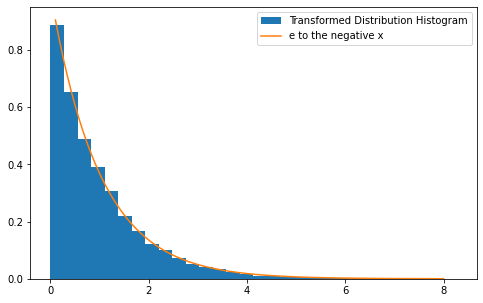

In [8]:
bins = 30
n = 10000

# Set up the plot and figures
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5)

# Plot transformed distribution
x = np.random.rand(n)
x1 = np.log(1/(1-x))
ax.hist(x1, bins=bins, density=True,label="Transformed Distribution Histogram")

def e_to_the_neg_x(x): # function to return e to the negtive x
    return math.e ** (-x)

# Plot e to the negative x
x_values = np.linspace(0.1, 8, 100)
y = np.array([e_to_the_neg_x(i) for i in x_values])
ax.plot(x_values, y, label="e to the negative x")

plt.legend()

if SAVE:
    fig.savefig(f'3_inverse_CDF_method.png', dpi=fig.dpi)

plt.show()


## 4. Simulation from non-standard densities

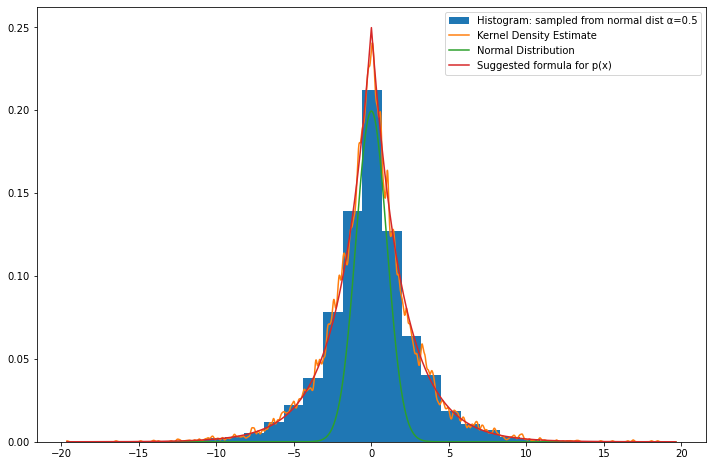

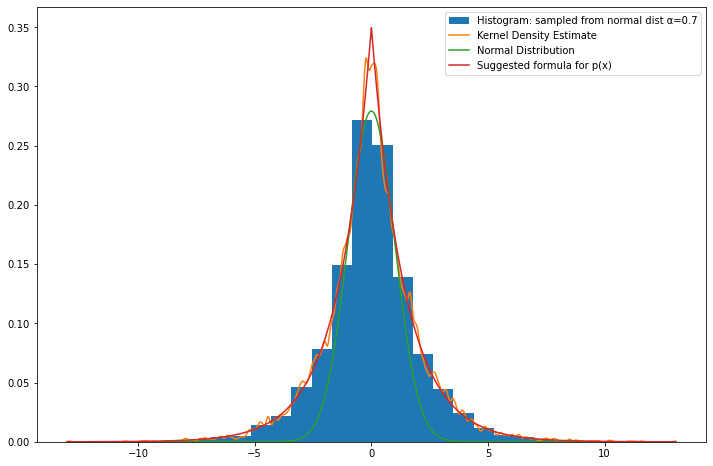

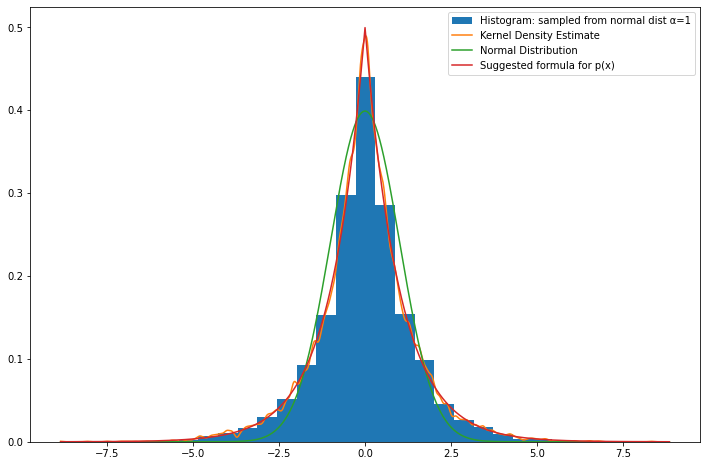

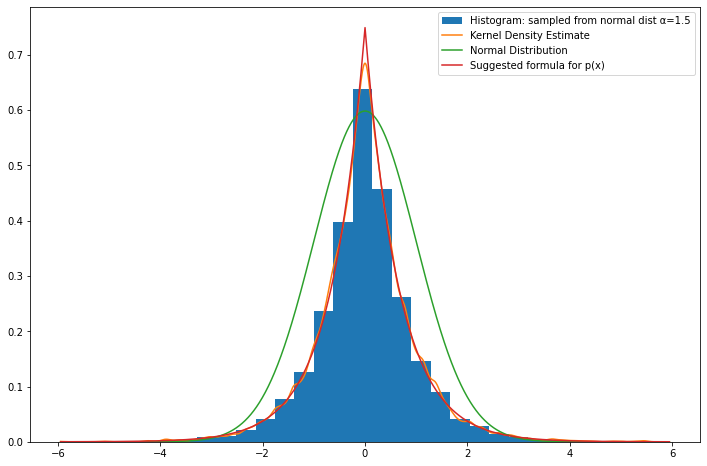

0.1 -0.14897224165623096 -2.9507727766393015
0.5 -0.439393099482843 -1.4591502184007026
0.7 -0.6918581519227937 -1.0633608242208894
1 -0.9866754628370129 -0.7243084908349366
1.5 -1.4591052209601272 -0.30279947721922645
2 -1.9121107264902404 -0.04541097870017931


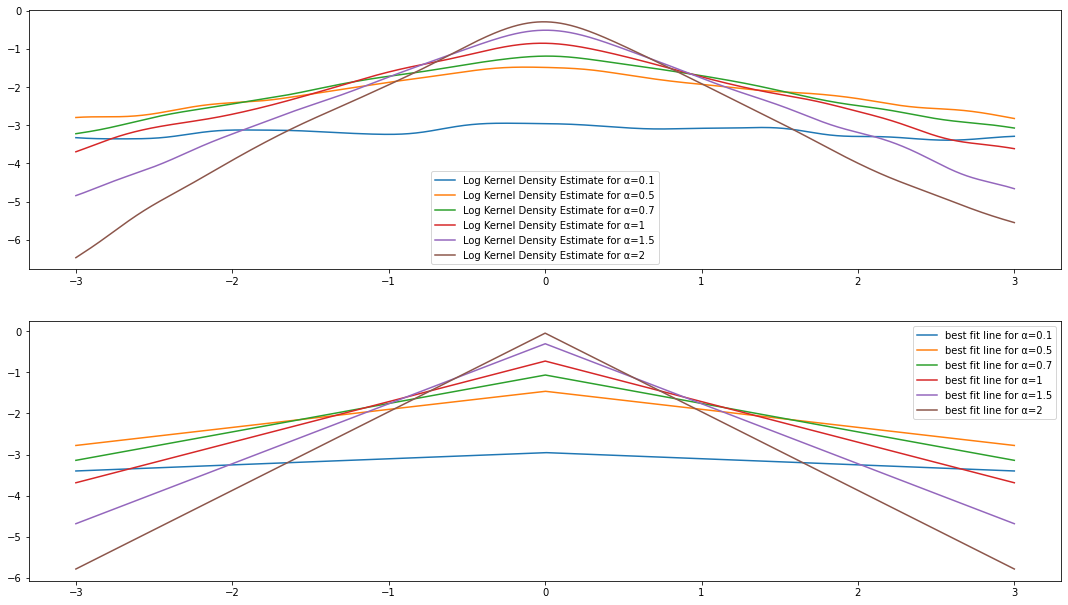

In [9]:
n = 10000

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

def simu_non_standard(alpha, normal=False, px_formula=True):
    # Draw variances from the exponential distribution
    variances = np.random.exponential(scale=2/(alpha**2), size=n)
    # change from variance to standard deviation
    sd = np.sqrt(variances) 
    # get a sample from the normal distribution with standard deviation
    normal_sample = np.random.randn(n) * sd
    
    # Plot the sampled data
    fig, ax = plt.subplots(1)
    fig.set_size_inches(12, 8)
    hist_array = ax.hist(normal_sample, 
                         bins=bins, 
                         density=True, 
                         label=f"Histogram: sampled from normal dist α={alpha}")
    
    # To make range of x dynamic to the histogram
    x_range = max(abs(max(hist_array[1])), abs(min(hist_array[1])))
    
    # Plot kernel density estimate
    ks_density = ksdensity(normal_sample, width=0.07)
    x_values = np.linspace(-x_range, x_range, 10000)
    ax.plot(x_values, ks_density(x_values), label="Kernel Density Estimate")
    
    if normal: # Overlay normal distribution
        ax.plot(x_values, stats.norm.pdf(x_values, 0, 1)*alpha, label="Normal Distribution")
    
    if px_formula: #Overlay the guessed formula of p(x)
        x_values = np.linspace(-x_range, x_range, n)
        y_values = (alpha/2) * np.exp(-alpha * np.absolute(x_values))
        ax.plot(x_values, y_values, label="Suggested formula for p(x)")
    
    plt.legend()
    
    if SAVE:
        fig.savefig(f'4_simulation_from_non-standard_densities_alpha_{alpha*10}.png', dpi=fig.dpi)
    
    plt.show()


def best_fit(array_x, array_y):
    pos_x = np.array([x for x in array_x if x > 0 ])
    pos_y = array_y[-len(pos_x):]
    return np.polyfit(pos_x, pos_y, 1)


def simu_non_standard_log(alphas): # can be approx by y = m*abs(x) + c
    fig, ax = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)
    for alpha in alphas:
        variances = np.random.exponential(scale=2/(alpha**2), size=n)
        sd = np.sqrt(variances)
        normal_sample = np.random.randn(n) * sd
        ks_density = ksdensity(normal_sample, width=0.2)
        # np.linspace(start, stop, number of steps)
        x_values = np.linspace(-3, 3, 10000)
        log_ks = np.log(ks_density(x_values))
        ax[0].plot(x_values, log_ks, label=f"Log Kernel Density Estimate for α={alpha}")
        
        m, c = best_fit(x_values, log_ks)
        ax[1].plot(x_values, m*abs(x_values)+c, label=f"best fit line for α={alpha}")
        print(alpha, m, c)
    ax[0].legend()
    ax[1].legend()
    if SAVE:
        fig.savefig(f'4_log_and_best_fit_simulation_alpha_{alpha*10}.png', dpi=fig.dpi)
    plt.show()

simu_non_standard(0.5, True)
simu_non_standard(0.7, True)
simu_non_standard(1, True)
simu_non_standard(1.5, True)

simu_non_standard_log([0.1, 0.5, 0.7, 1, 1.5, 2])